In [4]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sakshisingh2004","key":"f626c23ce1fe8ed0efe258138c0748b0"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d znevzz/the-news-dataset


Dataset URL: https://www.kaggle.com/datasets/znevzz/the-news-dataset
License(s): unknown
  0% 0.00/109M [00:00<?, ?B/s]
100% 109M/109M [00:00<00:00, 1.63GB/s]


In [7]:
!unzip -o the-news-dataset.zip


Archive:  the-news-dataset.zip
  inflating: README.md               
  inflating: data/README.md          
  inflating: data/explicit/company_keyword.xlsx  
  inflating: data/json/AX_sentiment.json  
  inflating: data/json/NSE-AX.json   
  inflating: data/json/NSE-REL.json  
  inflating: data/json/NSE-TCS.json  
  inflating: data/json/REL_sentiment.json  
  inflating: data/json/TCS_sentiment.json  
  inflating: data/processed/data_merged.csv  
  inflating: data/processed/data_o1.csv  
  inflating: data/processed/data_o2.csv  
  inflating: data/processed/data_o3.csv  
  inflating: data/processed/labeled.csv  
  inflating: data/processed/normalized.csv  
  inflating: data/quandl/NSE-AX.csv  
  inflating: data/quandl/NSE-REL.csv  
  inflating: data/quandl/NSE-TCS.csv  
  inflating: data/scrapy/livemint_data.csv  
  inflating: data/scrapy/livemint_data_2.csv  
  inflating: data/scrapy/livemint_data_3.csv  
  inflating: data/scrapy/livemint_data_body.csv  
  inflating: data/scrapy/livemint_

In [11]:
!find . -type f -name "*.csv"

./test/livemint_data_body_2.csv
./test/livemint_data.csv
./test/data_joined_2.csv
./test/REL_score_open.csv
./test/data_o1.csv
./test/REL_qs.csv
./test/NSE-TCS.csv
./test/REL.csv
./test/TCS_sentiment.csv
./test/TCS_score_close.csv
./test/REL_score_close.csv
./test/REL_corr.csv
./test/livemint_data_2.csv
./test/data_o2.csv
./test/livemint_data_body.csv
./test/TCS_score_open.csv
./test/TCS_qs.csv
./test/NSE-RELIANCE.csv
./test/REL_score.csv
./test/labeled_old_v1.csv
./test/normalized.csv
./test/REL_sentiment.csv
./test/TCS.csv
./test/data_o3.csv
./test/labeled.csv
./main/AX_qs.csv
./main/AX_score_open.csv
./main/REL_score_open.csv
./main/REL_qs.csv
./main/NSE-TCS.csv
./main/AX_score_close.csv
./main/NSE-REL.csv
./main/REL.csv
./main/TCS_sentiment.csv
./main/TCS_score_close.csv
./main/REL_score_close.csv
./main/TCS_score_open.csv
./main/TCS_qs.csv
./main/AX.csv
./main/REL_sentiment.csv
./main/TCS.csv
./main/NSE-AX.csv
./main/AX__sentiment.csv
./main/AX_sentiment.csv
./main/labeled.csv
./r

In [15]:
import pandas as pd

# Load labeled dataset (with sentiment scores)
labeled_df = pd.read_csv('data/processed/labeled.csv')

# Display the first few rows
print("Labeled Dataset:")
display(labeled_df.head())

Labeled Dataset:


,Unnamed: 0,body,date,id,intro,score,time,title
0,0,New Delhi: State-run Rural Electrification Cor...,2016-11-09,00wS6lZEcgYyCPt6mIXwrJ,"The company had posted a net profit of Rs1,61...",0.89,22:38,"REC net profit up 8% at Rs1,751 crore in July-..."
1,0,"Two sets of findings, related to societal trus...",2017-01-24,0229PSUGl9BxwsW7urHATP,The resulting trust deficit has had several di...,0.48,12:47,The consequences of declining trust in CEOs
2,0,Mumbai: The ministry of corporate affairs (MCA...,2016-11-15,02A1DgXR3wUC7xEX4UzqHN,Rejecting reasons cited for not spending on CS...,-0.14,02:13,MCA pulls up companies over lack of CSR spends
3,0,New Delhi: The central governments decision t...,2016-11-10,02xKYa7PKoROOpbx5xbxhM,"E-wallet companies like Paytm, Freecharge are ...",0.58,01:21,Demonetization to give major push to e-wallets...
4,0,"Pune: The 57-year-old boss of Tech Mahindra, C...",2016-12-21,05PcYpZOmBeSeBLoMPqETN,Tech Mahindra CEO CP Gurnani on bets his firm ...,-0.02,03:19,"By 2020, 50% of Tech Mahindras business will ..."


In [16]:
# Check basic info
print("Labeled Dataset Info:")
print(labeled_df.info())

# Check for missing values
print("\nMissing Values in Labeled Dataset:")
print(labeled_df.isnull().sum())

Labeled Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2099 non-null   int64  
 1   body        2089 non-null   object 
 2   date        2099 non-null   object 
 3   id          2099 non-null   object 
 4   intro       2099 non-null   object 
 5   score       2099 non-null   float64
 6   time        2099 non-null   object 
 7   title       2099 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 131.3+ KB
None

Missing Values in Labeled Dataset:
Unnamed: 0     0
body          10
date           0
id             0
intro          0
score          0
time           0
title          0
dtype: int64


In [17]:
# Drop the unnecessary column
labeled_df.drop(columns=['Unnamed: 0'], inplace=True)

# Fill missing 'body' values correctly to avoid warning
labeled_df.loc[:, 'body'] = labeled_df['body'].fillna(labeled_df['title'] + " " + labeled_df['intro'])

# Confirm there are no missing values now
print("\nMissing Values After Cleaning (Labeled Dataset):")
print(labeled_df.isnull().sum())


Missing Values After Cleaning (Labeled Dataset):
body     0
date     0
id       0
intro    0
score    0
time     0
title    0
dtype: int64


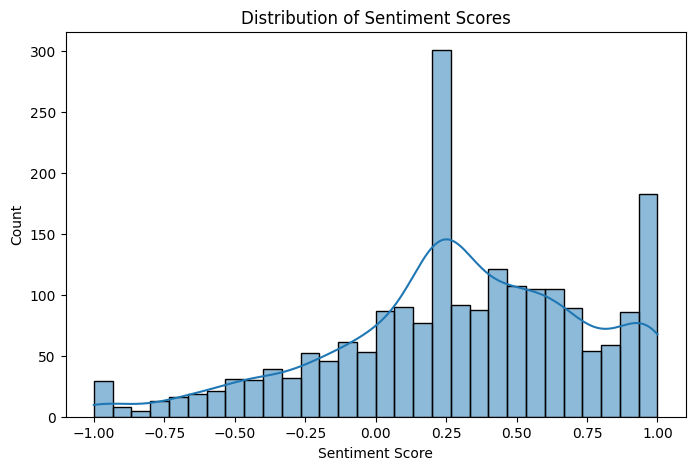

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment score distribution
plt.figure(figsize=(8, 5))
sns.histplot(labeled_df['score'], bins=30, kde=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Scores')
plt.show()

sentiment_label
Positive    1367
Neutral      445
Negative     287
Name: count, dtype: int64


/tmp/ipython-input-710026248.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labeled_df['sentiment_label'], palette='viridis')


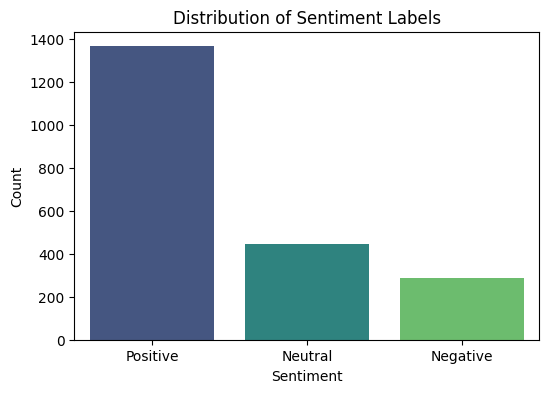

In [19]:
# Define sentiment categories
def classify_sentiment(score):
    if score > 0.2:
        return 'Positive'
    elif score < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

# Apply function to create a new sentiment label column
labeled_df['sentiment_label'] = labeled_df['score'].apply(classify_sentiment)

# Check the distribution of sentiment labels
print(labeled_df['sentiment_label'].value_counts())

# Visualizing sentiment label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=labeled_df['sentiment_label'], palette='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.show()

In [20]:
!pip install --upgrade transformers datasets gcsfs fsspec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.8/506.8 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0
  Attempting uninstall: gcsfs
    Found existing installation: gcsfs 2025.3.0
    Uninstalling gcsfs-2025.3.0:
      Successfully uninstalled gcsfs-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour 

In [ ]:
!pip uninstall torch torchvision torchaudio fastai -y
!pip install torch==2.6.0 torchvision==0.21.0 torchaudio==2.6.0 fastai

In [1]:
import transformers
import datasets
import torch
import torchvision
import torchaudio
import fastai

print(transformers.__version__)
print(torch.__version__)
print(torchvision.__version__)
print(torchaudio.__version__)
print(fastai.__version__)

4.57.1
2.8.0+cu126
0.23.0+cu126
2.8.0+cu126
2.8.4


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification

# Load FinBERT tokenizer & model
MODEL_NAME = "ProsusAI/finbert"
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)  # 3 labels: Positive, Neutral, Negative

In [ ]:
# Convert sentiment labels to numerical format
label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
labeled_df['sentiment_label'] = labeled_df['sentiment_label'].map(label_mapping)

# Ensure the labels are integers
labeled_df['sentiment_label'] = labeled_df['sentiment_label'].astype(int)

In [ ]:
import torch

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [ ]:
# Reset index before splitting to avoid index mismatch issues
labeled_df = labeled_df.reset_index(drop=True)

# Split dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    labeled_df['body'],  # Use raw text data
    labeled_df['sentiment_label'],
    test_size=0.2,
    random_state=42
)

In [ ]:
from torch.utils.data import Dataset, DataLoader

# Define the dataset class
class FinancialNewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=256):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors="pt"
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create dataset objects
train_dataset = FinancialNewsDataset(
    texts=X_train.tolist(),
    labels=y_train.tolist(),
    tokenizer=tokenizer
)

test_dataset = FinancialNewsDataset(
    texts=X_test.tolist(),
    labels=y_test.tolist(),
    tokenizer=tokenizer
)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [ ]:
# Define optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# Define loss function
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
from torch.cuda.amp import GradScaler, autocast
from tqdm import tqdm  # For progress bar

scaler = GradScaler()  # Helps prevent FP16 instability
epochs = 3

for epoch in range(epochs):
    model.train()
    loop = tqdm(train_loader, leave=True)  # Show training progress

    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()

        with autocast():  # Enables mixed precision
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # Update progress bar
        loop.set_description(f"Epoch {epoch+1}")
        loop.set_postfix(loss=loss.item())

In [ ]:
import torch
import torch.nn.functional as F
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Step 1: Extract FinBERT logits from training set
xgb_train_features = []
xgb_train_labels = []

model.eval()
with torch.no_grad():
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        xgb_train_features.extend(logits.cpu().numpy())
        xgb_train_labels.extend(labels.cpu().numpy())

# Step 2: Train XGBoost on FinBERT logits
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(xgb_train_features, xgb_train_labels)

# Step 3: Evaluate both FinBERT and XGBoost on test set
correct, total = 0, 0
all_labels = []
all_predictions = []
all_predictions_proba = []
xgb_test_features = []
xgb_test_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probs = F.softmax(logits, dim=1)
        predictions = torch.argmax(probs, dim=1)

        correct += (predictions == labels).sum().item()
        total += labels.size(0)

        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())
        all_predictions_proba.extend(probs.cpu().numpy())

        xgb_test_features.extend(logits.cpu().numpy())
        xgb_test_labels.extend(labels.cpu().numpy())

# Step 4: FinBERT Metrics
accuracy = correct / total
print(f"\nFinBERT Test Accuracy: {accuracy:.4f}")
report = classification_report(all_labels, all_predictions, target_names=['Negative', 'Neutral', 'Positive'], digits=4)
print("\nFinBERT Classification Report:\n", report)

# Step 5: XGBoost Metrics
xgb_preds = xgb_model.predict(xgb_test_features)
xgb_accuracy = accuracy_score(xgb_test_labels, xgb_preds)
xgb_report = classification_report(xgb_test_labels, xgb_preds, target_names=['Negative', 'Neutral', 'Positive'], digits=4)

print(f"\nXGBoost on FinBERT Logits - Test Accuracy: {xgb_accuracy:.4f}")
print("\nXGBoost Classification Report:\n", xgb_report)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Step 1: Generate dictionaries for FinBERT and XGBoost

finbert_report_dict = classification_report(
    all_labels,
    all_predictions,
    target_names=['Negative', 'Neutral', 'Positive'],
    digits=4,
    output_dict=True
)

xgb_report_dict = classification_report(
    xgb_test_labels,
    xgb_preds,
    target_names=['Negative', 'Neutral', 'Positive'],
    digits=4,
    output_dict=True
)

# Step 2: Extract Precision, Recall, F1-Score

finbert_precision = [
    finbert_report_dict['Negative']['precision'],
    finbert_report_dict['Neutral']['precision'],
    finbert_report_dict['Positive']['precision'],
]
finbert_recall = [
    finbert_report_dict['Negative']['recall'],
    finbert_report_dict['Neutral']['recall'],
    finbert_report_dict['Positive']['recall'],
]
finbert_f1 = [
    finbert_report_dict['Negative']['f1-score'],
    finbert_report_dict['Neutral']['f1-score'],
    finbert_report_dict['Positive']['f1-score'],
]

xgb_precision = [
    xgb_report_dict['Negative']['precision'],
    xgb_report_dict['Neutral']['precision'],
    xgb_report_dict['Positive']['precision'],
]
xgb_recall = [
    xgb_report_dict['Negative']['recall'],
    xgb_report_dict['Neutral']['recall'],
    xgb_report_dict['Positive']['recall'],
]
xgb_f1 = [
    xgb_report_dict['Negative']['f1-score'],
    xgb_report_dict['Neutral']['f1-score'],
    xgb_report_dict['Positive']['f1-score'],
]

# Step 3: Plotting

# Set an overall style
plt.style.use('seaborn-v0_8-deep')

labels = ['Negative', 'Neutral', 'Positive']
x = np.arange(len(labels))
width = 0.35

colors_finbert = ['#1f77b4', '#1f77b4', '#1f77b4']  # blue shades
colors_xgb = ['#ff7f0e', '#ff7f0e', '#ff7f0e']       # orange shades

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Precision
axs[0].bar(x - width/2, finbert_precision, width, label='FinBERT', color=colors_finbert)
axs[0].bar(x + width/2, xgb_precision, width, label='XGBoost on FinBERT', color=colors_xgb)
axs[0].set_title('Precision Comparison', fontsize=14, fontweight='bold')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels, fontsize=12)
axs[0].set_ylim(0, 1)
axs[0].legend(fontsize=11)
for bar in axs[0].containers:
    axs[0].bar_label(bar, fmt='%.2f', padding=3, fontsize=10)

# Recall
axs[1].bar(x - width/2, finbert_recall, width, label='FinBERT', color=colors_finbert)
axs[1].bar(x + width/2, xgb_recall, width, label='XGBoost on FinBERT', color=colors_xgb)
axs[1].set_title('Recall Comparison', fontsize=14, fontweight='bold')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels, fontsize=12)
axs[1].set_ylim(0, 1)
axs[1].legend(fontsize=11)
for bar in axs[1].containers:
    axs[1].bar_label(bar, fmt='%.2f', padding=3, fontsize=10)

# F1-Score
axs[2].bar(x - width/2, finbert_f1, width, label='FinBERT', color=colors_finbert)
axs[2].bar(x + width/2, xgb_f1, width, label='XGBoost on FinBERT', color=colors_xgb)
axs[2].set_title('F1-Score Comparison', fontsize=14, fontweight='bold')
axs[2].set_xticks(x)
axs[2].set_xticklabels(labels, fontsize=12)
axs[2].set_ylim(0, 1)
axs[2].legend(fontsize=11)
for bar in axs[2].containers:
    axs[2].bar_label(bar, fmt='%.2f', padding=3, fontsize=10)

# Overall Figure Title
fig.suptitle('Performance Metrics Comparison: FinBERT vs XGBoost', fontsize=18, fontweight='bold')

# layout
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

In [ ]:
!pip install imbalanced-learn

In [ ]:
import spacy
from transformers import MarianMTModel, MarianTokenizer
import random
import torch
import pandas as pd
from tqdm import tqdm

# Load spaCy model for synonym replacement
nlp = spacy.load("en_core_web_sm")

# Load MarianMT model for back translation
model_name = "Helsinki-NLP/opus-mt-en-fr"
tokenizer_mt = MarianTokenizer.from_pretrained(model_name)
model_mt = MarianMTModel.from_pretrained(model_name).to("cuda" if torch.cuda.is_available() else "cpu")

# Function for synonym replacement
def synonym_replacement(text):
    doc = nlp(text)
    new_words = []
    for token in doc:
        if token.pos_ in {"NOUN", "VERB", "ADJ", "ADV"} and random.random() < 0.3:  # 30% chance to replace
            syns = [syn.text for syn in token.vocab if syn.is_alpha and syn.text != token.text]
            new_words.append(random.choice(syns) if syns else token.text)
        else:
            new_words.append(token.text)
    return " ".join(new_words)

# Function for back translation (using batch processing)
def back_translate_batch(texts, batch_size=8):
    translated_texts = []

    for i in tqdm(range(0, len(texts), batch_size), desc="Back Translating"):
        batch = texts[i : i + batch_size]

        # Step 1: Translate to French
        inputs = tokenizer_mt(batch, return_tensors="pt", padding=True, truncation=True, max_length=400).to(model_mt.device)
        translated = model_mt.generate(**inputs, max_length=400)
        fr_texts = tokenizer_mt.batch_decode(translated, skip_special_tokens=True)

        # Step 2: Translate back to English
        inputs_back = tokenizer_mt(fr_texts, return_tensors="pt", padding=True, truncation=True, max_length=400).to(model_mt.device)
        back_translated = model_mt.generate(**inputs_back, max_length=400)
        translated_texts.extend(tokenizer_mt.batch_decode(back_translated, skip_special_tokens=True))

    return translated_texts

# Apply augmentation only to Negative & Neutral samples
negative_neutral_texts = [text for text, label in zip(labeled_df['body'], labeled_df['sentiment_label']) if label in [0, 1]]
negative_neutral_labels = [label for label in labeled_df['sentiment_label'] if label in [0, 1]]

# Choose between synonym replacement and back translation
augmented_texts = []
for text in negative_neutral_texts:
    if random.random() < 0.5:
        augmented_texts.append(synonym_replacement(text))
    else:
        augmented_texts.append(text)  # Placeholder, replaced later with back translation

# Perform back translation in batches
back_translated_texts = back_translate_batch([text for text in augmented_texts if text], batch_size=8)

# Replace placeholders with back-translated text
idx = 0
for i in range(len(augmented_texts)):
    if augmented_texts[i] == "":
        augmented_texts[i] = back_translated_texts[idx]
        idx += 1

# Create DataFrame for augmented data
augmented_df = pd.DataFrame({"body": augmented_texts, "sentiment_label": negative_neutral_labels})

# Append augmented data to original dataset
labeled_df = pd.concat([labeled_df, augmented_df]).reset_index(drop=True)

print("Data augmentation complete! New dataset size:", len(labeled_df))

In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data into numerical vectors
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(labeled_df['body'])

# Convert labels to numpy array
y = labeled_df['sentiment_label'].values

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Get indices of resampled data
resampled_indices = smote.fit_resample(np.arange(len(labeled_df)).reshape(-1, 1), y)[0].flatten()

# Create the balanced DataFrame
balanced_df = labeled_df.iloc[resampled_indices].reset_index(drop=True)

print("SMOTE applied successfully!")
print("New class distribution:\n", balanced_df['sentiment_label'].value_counts())

In [ ]:
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torch.cuda.amp import GradScaler, autocast
from tqdm import tqdm

# After augmentation completed
print(f"Final Dataset Size: {len(balanced_df)}")

# Split the dataset
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    balanced_df['body'].tolist(),
    balanced_df['sentiment_label'].tolist(),
    test_size=0.3,
    random_state=42
)

val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts,
    temp_labels,
    test_size=0.5,
    random_state=42
)

# Create Datasets and Loaders
train_dataset = FinancialNewsDataset(train_texts, train_labels, tokenizer, max_length=384)
val_dataset = FinancialNewsDataset(val_texts, val_labels, tokenizer, max_length=384)
test_dataset = FinancialNewsDataset(test_texts, test_labels, tokenizer, max_length=384)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Learning Rate
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-6)

In [ ]:
import torch

# Adjusted Class Weights
adjusted_class_weights = torch.tensor([1.9, 1.6, 0.5], dtype=torch.float).to(device)

# Define loss function with updated weights
criterion = torch.nn.CrossEntropyLoss(weight=adjusted_class_weights)

print("New Adjusted Class Weights:", adjusted_class_weights)

In [ ]:
from torch.cuda.amp import GradScaler, autocast
from tqdm import tqdm

scaler = GradScaler()
epochs = 5

for epoch in range(epochs):
    model.train()
    loop = tqdm(train_loader, leave=True)
    total_train_loss = 0

    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()

        with autocast():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = criterion(outputs.logits, labels)

        total_train_loss += loss.item()

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        loop.set_description(f"Epoch {epoch+1}")
        loop.set_postfix(loss=loss.item())

    avg_train_loss = total_train_loss / len(train_loader)
    print(f"Epoch {epoch+1} Training Loss: {avg_train_loss:.4f}")

    # VALIDATION
    model.eval()
    total_val_loss = 0
    correct, total = 0, 0

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)

            loss = criterion(outputs.logits, labels)
            total_val_loss += loss.item()

            predictions = torch.argmax(outputs.logits, dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = correct / total
    print(f"Epoch {epoch+1} Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

print("\nModel training complete!")

In [ ]:
import torch.nn.functional as F
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Step 1: Extract FinBERT logits from training set for XGBoost
xgb_train_features = []
xgb_train_labels = []

model.eval()
with torch.no_grad():
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits  # shape: [batch_size, 3]

        xgb_train_features.extend(logits.cpu().numpy())
        xgb_train_labels.extend(labels.cpu().numpy())

# Step 2: Train XGBoost on FinBERT logits
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(xgb_train_features, xgb_train_labels)

# Step 3: Extract FinBERT logits from test set
xgb_test_features = []
xgb_test_labels = []

correct, total = 0, 0
all_labels = []
all_predictions = []
all_predictions_proba = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probs = F.softmax(logits, dim=1)
        predictions = torch.argmax(probs, dim=1)

        correct += (predictions == labels).sum().item()
        total += labels.size(0)

        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())
        all_predictions_proba.extend(probs.cpu().numpy())

        xgb_test_features.extend(logits.cpu().numpy())
        xgb_test_labels.extend(labels.cpu().numpy())

# Step 4: Evaluate FinBERT Accuracy
accuracy = correct / total
print(f"\nFinBERT Test Accuracy: {accuracy:.4f}")
report = classification_report(all_labels, all_predictions, target_names=['Negative', 'Neutral', 'Positive'], digits=4)
print("\nFinBERT Classification Report:\n", report)

# Step 5: Evaluate XGBoost on FinBERT logits
xgb_preds = xgb_model.predict(xgb_test_features)
xgb_accuracy = accuracy_score(xgb_test_labels, xgb_preds)
xgb_report = classification_report(xgb_test_labels, xgb_preds, target_names=['Negative', 'Neutral', 'Positive'], digits=4)

print(f"\nXGBoost on FinBERT Logits - Test Accuracy: {xgb_accuracy:.4f}")
print("\nXGBoost Classification Report:\n", xgb_report)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Step 1: Generate dictionaries for FinBERT and XGBoost

finbert_report_dict = classification_report(
    all_labels,
    all_predictions,
    target_names=['Negative', 'Neutral', 'Positive'],
    digits=4,
    output_dict=True
)

xgb_report_dict = classification_report(
    xgb_test_labels,
    xgb_preds,
    target_names=['Negative', 'Neutral', 'Positive'],
    digits=4,
    output_dict=True
)

# Step 2: Extract Precision, Recall, F1-Score

finbert_precision = [
    finbert_report_dict['Negative']['precision'],
    finbert_report_dict['Neutral']['precision'],
    finbert_report_dict['Positive']['precision'],
]
finbert_recall = [
    finbert_report_dict['Negative']['recall'],
    finbert_report_dict['Neutral']['recall'],
    finbert_report_dict['Positive']['recall'],
]
finbert_f1 = [
    finbert_report_dict['Negative']['f1-score'],
    finbert_report_dict['Neutral']['f1-score'],
    finbert_report_dict['Positive']['f1-score'],
]

xgb_precision = [
    xgb_report_dict['Negative']['precision'],
    xgb_report_dict['Neutral']['precision'],
    xgb_report_dict['Positive']['precision'],
]
xgb_recall = [
    xgb_report_dict['Negative']['recall'],
    xgb_report_dict['Neutral']['recall'],
    xgb_report_dict['Positive']['recall'],
]
xgb_f1 = [
    xgb_report_dict['Negative']['f1-score'],
    xgb_report_dict['Neutral']['f1-score'],
    xgb_report_dict['Positive']['f1-score'],
]

# Step 3: Plotting

# Set an overall style
plt.style.use('seaborn-v0_8-deep')

labels = ['Negative', 'Neutral', 'Positive']
x = np.arange(len(labels))
width = 0.35

colors_finbert = ['#2ca02c', '#2ca02c', '#2ca02c']  # green shades (for FinBERT)
colors_xgb = ['#d62728', '#d62728', '#d62728']       # red shades (for XGBoost)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Precision
axs[0].bar(x - width/2, finbert_precision, width, label='FinBERT', color=colors_finbert)
axs[0].bar(x + width/2, xgb_precision, width, label='XGBoost on FinBERT', color=colors_xgb)
axs[0].set_title('Precision Comparison', fontsize=14, fontweight='bold')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels, fontsize=12)
axs[0].set_ylim(0.85, 1.0)
axs[0].legend(fontsize=11)
for bar in axs[0].containers:
    axs[0].bar_label(bar, fmt='%.4f', padding=3, fontsize=10)

# Recall
axs[1].bar(x - width/2, finbert_recall, width, label='FinBERT', color=colors_finbert)
axs[1].bar(x + width/2, xgb_recall, width, label='XGBoost on FinBERT', color=colors_xgb)
axs[1].set_title('Recall Comparison', fontsize=14, fontweight='bold')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels, fontsize=12)
axs[1].set_ylim(0.85, 1.0)
axs[1].legend(fontsize=11)
for bar in axs[1].containers:
    axs[1].bar_label(bar, fmt='%.4f', padding=3, fontsize=10)

# F1-Score
axs[2].bar(x - width/2, finbert_f1, width, label='FinBERT', color=colors_finbert)
axs[2].bar(x + width/2, xgb_f1, width, label='XGBoost on FinBERT', color=colors_xgb)
axs[2].set_title('F1-Score Comparison', fontsize=14, fontweight='bold')
axs[2].set_xticks(x)
axs[2].set_xticklabels(labels, fontsize=12)
axs[2].set_ylim(0.85, 1.0)
axs[2].legend(fontsize=11)
for bar in axs[2].containers:
    axs[2].bar_label(bar, fmt='%.4f', padding=3, fontsize=10)

# Overall Figure Title
fig.suptitle('FinBERT vs XGBoost on FinBERT (Test Set)', fontsize=18, fontweight='bold')

# layout
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report

# Convert Model Outputs to Probabilities (For PR Curve)
model.eval()
all_probabilities = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        probs = torch.nn.functional.softmax(outputs.logits, dim=1)  # Convert logits to probabilities

        all_probabilities.extend(probs.cpu().numpy())

# Convert to NumPy arrays
y_true = np.array(all_labels)  # Already collected in evaluation
y_pred = np.array(all_predictions)
y_pred_proba = np.array(all_probabilities)  # Model probabilities

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Convert true labels to one-hot encoding
num_classes = 3  # Negative, Neutral, Positive
y_true_one_hot = np.eye(num_classes)[y_true]

# Define colors for each class
colors = ["red", "blue", "green"]
class_names = ["Negative", "Neutral", "Positive"]

# Create subplots: One plot per class
fig, axes = plt.subplots(1, num_classes, figsize=(15, 5), sharex=True, sharey=True)

for i, ax in enumerate(axes):
    precision, recall, _ = precision_recall_curve(y_true_one_hot[:, i], y_pred_proba[:, i])

    ax.plot(recall, precision, color=colors[i], linewidth=2)  # Smoother lines
    ax.set_title(f"PR Curve - {class_names[i]}")
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.grid(True, linestyle="--", alpha=0.6)

# Adjust layout for clarity
plt.tight_layout()
plt.show()

In [ ]:
# Accuracy Before vs After SMOTE
accuracy_before_smote = 0.6524
accuracy_after_smote = accuracy

# Create a bar plot for comparison
plt.figure(figsize=(5, 5))
plt.bar(
    ["Before SMOTE", "After SMOTE"],
    [accuracy_before_smote, accuracy_after_smote],
    color=["red", "green"]
)

# Adding labels and title
plt.ylabel("Accuracy")
plt.title("Model Accuracy: \nBefore vs After Data Augmentation and SMOTE\n", fontsize=14)
plt.ylim(0.0, 1.0)  # To show the full range of accuracy (0 to 1)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Sentiment Distribution of Financial News
plt.figure(figsize=(7, 5))
sns.histplot(all_predictions, bins=3, kde=False, color="purple", discrete=True)
#plt.xticks([0, 1, 2], labels=["Negative", "Neutral", "Positive"])
plt.xticks(ticks=[0, 1, 2], labels=["Negative", "Neutral", "Positive"], fontsize=12)
plt.title("Sentiment Distribution of Model Predictions")
plt.xlabel("Predicted Sentiment Class")
plt.ylabel("Count")
plt.show()

In [ ]:
# ROC-AUC Curve for Each Sentiment Class
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert labels to one-hot encoding for multi-class ROC
y_true_one_hot = label_binarize(all_labels, classes=[0, 1, 2])  # Assuming [Negative=0, Neutral=1, Positive=2]
y_pred_proba = np.array(all_predictions_proba)

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
class_labels = ["Negative", "Neutral", "Positive"]
colors = ["red", "blue", "green"]

for i, ax in enumerate(axes):
    fpr, tpr, _ = roc_curve(y_true_one_hot[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, color=colors[i], lw=2, label=f"AUC = {roc_auc:.2f}")
    ax.plot([0, 1], [0, 1], color="gray", linestyle="--")
    ax.set_title(f"ROC Curve - {class_labels[i]}")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(loc="lower right")
    ax.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

***DEPLOYMENT***

In [ ]:
!pip install gradio torch transformers

In [ ]:
import torch

# Define model path
model_path = "finbert_sentiment_model"

# Save trained model
model.save_pretrained(model_path)

# Save tokenizer
tokenizer.save_pretrained(model_path)

# Save optimizer state (optional, for resuming training)
torch.save(optimizer.state_dict(), model_path + "/optimizer.pt")

print(f"Model saved to {model_path}")

In [ ]:
# Load the Trained Model & Tokenizer for Deployment
import torch
import torch.nn.functional as F
from transformers import BertTokenizer, BertForSequenceClassification

# Load trained model & tokenizer
model_path = "finbert_sentiment_model"  # Path where model is saved
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()  # Set model to evaluation mode

# Define sentiment labels
sentiment_labels = ["Negative", "Neutral", "Positive"]

In [ ]:
# Define Sentiment Prediction Function
def predict_sentiment(text):
    """Predicts sentiment for given financial news text with rule-based adjustments."""
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt").to(device)

    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    probs = F.softmax(logits, dim=1)

    # Get highest probability label
    predicted_class = torch.argmax(probs, dim=1).item()
    confidence = probs[0, predicted_class].item()

    # Sentiment labels
    sentiment_labels = ["Negative", "Neutral", "Positive"]
    predicted_label = sentiment_labels[predicted_class]

    # RULE-BASED CORRECTIONS
    negative_keywords = ["crash", "plunge", "sell-off", "recession", "inflation", "cut jobs", "layoffs", "bankruptcy", "decline"]
    positive_keywords = ["rally", "soar", "record high", "growth", "profit", "recovery"]
    neutral_bias_corrections = ["Federal Reserve", "interest rate", "stimulus"]

    text_lower = text.lower()

    # If Neutral but contains clear negative words - Change to Negative
    if predicted_label == "Neutral" and any(word in text_lower for word in negative_keywords):
        predicted_label = "Negative"

    # If Neutral but contains clear positive words - Change to Positive
    elif predicted_label == "Neutral" and any(word in text_lower for word in positive_keywords):
        predicted_label = "Positive"

    # If Positive but contains negative indicators (like Fed rate hikes) - Reduce confidence
    if predicted_label == "Positive" and any(word in text_lower for word in neutral_bias_corrections):
        confidence *= 0.8

    return f"Sentiment: {predicted_label} (Confidence: {confidence:.2f})"

In [ ]:
import gradio as gr

# Deploy using Gradio
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=5, placeholder="Enter financial news text..."),
    outputs="text",
    title="Financial Sentiment Analysis",
    description="Enter financial news headlines or reports to analyze their sentiment (Positive, Neutral, Negative)."
)

# Launch Gradio app
interface.launch(share=True)